# Avacado Project

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
import pandas as pd
df=pd.read_csv("avacado.tsv",sep='\t')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [3]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

The unnamed:0 is the which is same as index, so that we can drop that column.

In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
df.shape

(18249, 13)

# Checking Null Values

In [7]:
df.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

<AxesSubplot:>

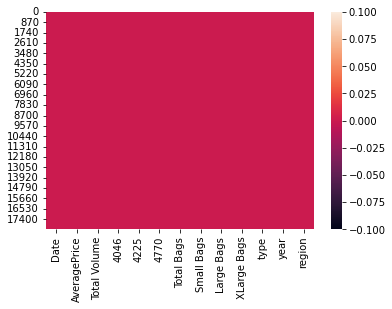

In [10]:
sns.heatmap(df.isnull())

We don't have any null values in our dataset.

# Summary Statistics

In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All the column counts are same in the dataset, so we don't have null values.

Maximum difference for the column XLargeBags in between 75th percentile and max.

Mean is greater than median for TotalVolume, so that this column is right skewed.

Median is greater than mean for the column 4046, it is left skewed.

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Encoding

We have two categorical datatype columns in the dataset, so first we encode that columns using LabelEncoder.

Label Encoder

In [13]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [14]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [15]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
548,14-06-2015,1.01,171353.59,83138.56,33535.09,20023.58,34656.36,27204.22,6030.43,1421.71,0,2015,10
14554,31-07-2016,1.24,4221.40,22.71,82.02,0.00,4116.67,4060.00,56.67,0.00,1,2016,50
2823,11-09-2016,1.37,81473.15,6258.88,63511.85,42.26,11660.16,10839.17,815.99,5.00,0,2016,0
8473,29-01-2017,0.74,979146.85,607131.32,61234.48,15028.65,295752.40,159375.80,136376.60,0.00,0,2017,53
268,01-11-2015,1.23,118541.11,2181.17,61874.92,186.40,54298.62,52956.40,1342.22,0.00,0,2015,5


In [16]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [17]:
le=LabelEncoder()
df['Date']=le.fit_transform(df['Date'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,72,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,33,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,151,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,112,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,73,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


we have successfully encoded all the categorical values into integers.

In [18]:
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

# Data Visualization

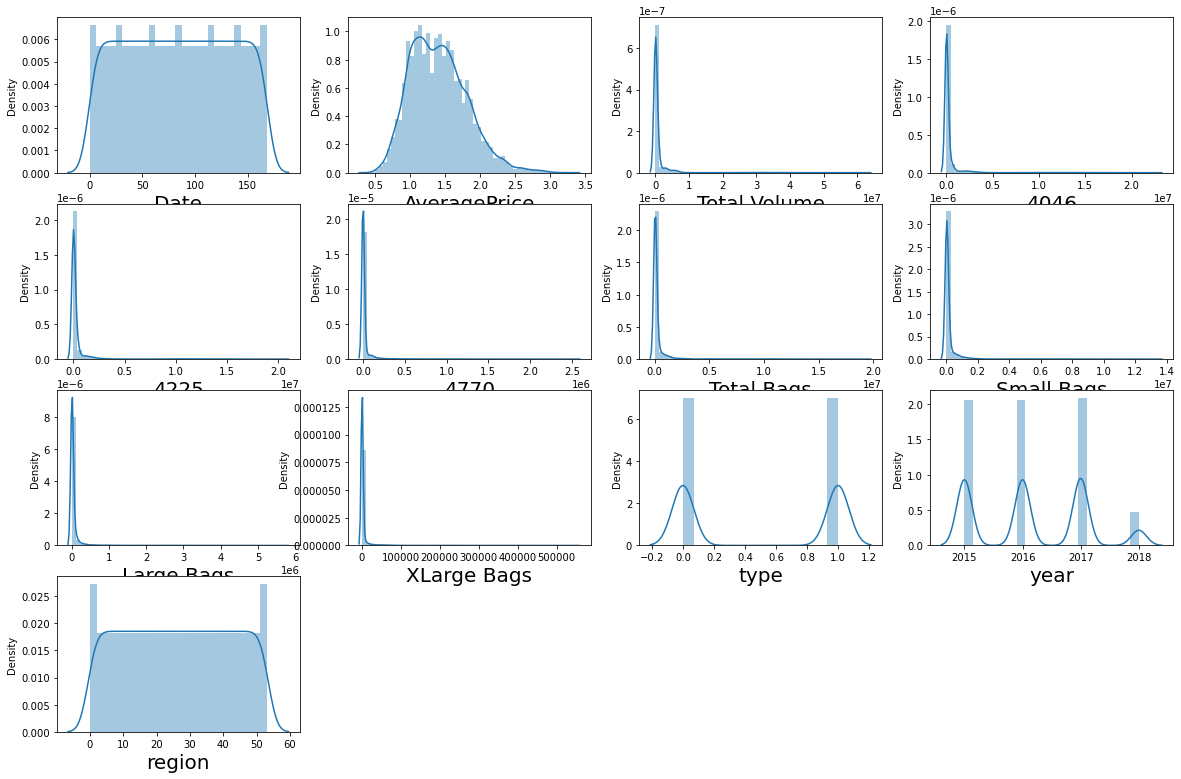

In [19]:
plt.figure(figsize=(20,20), facecolor='White')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The above plot shows skewness is present in many columns.

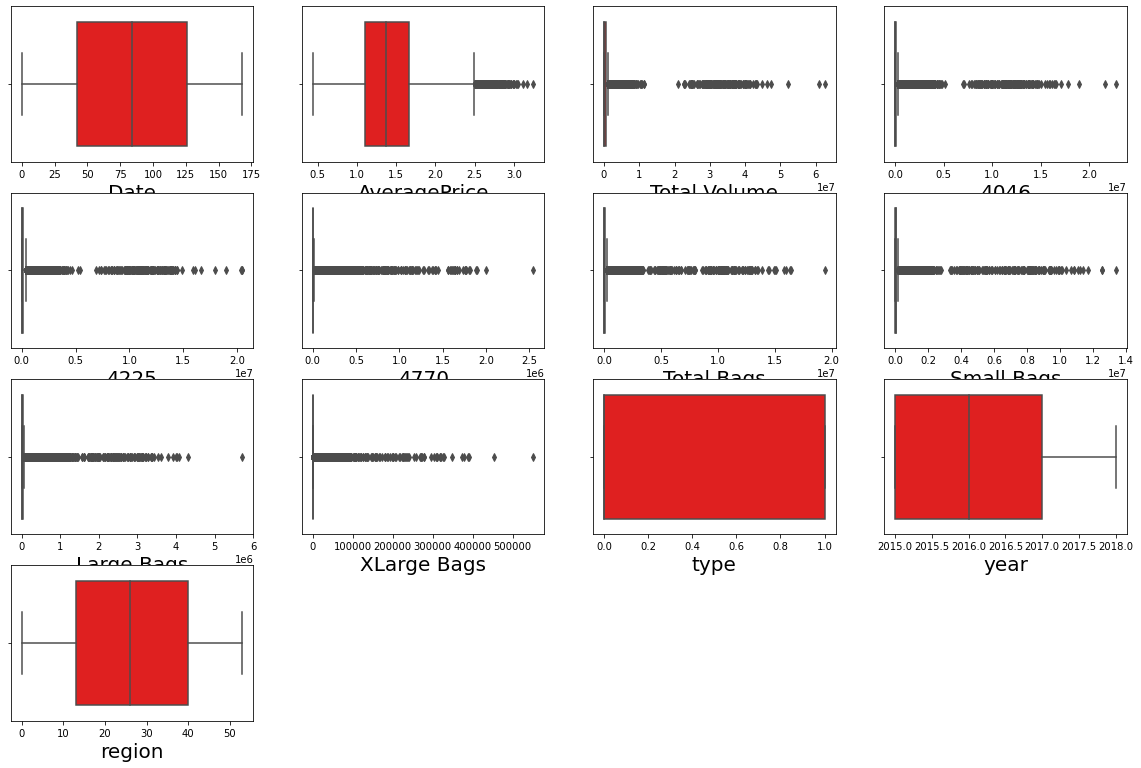

In [20]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column], color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

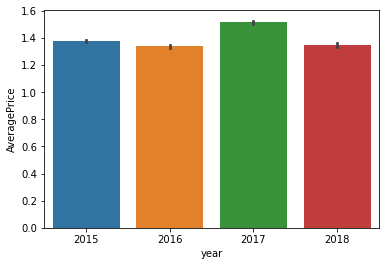

In [21]:
sns.barplot(x='year',y='AveragePrice',data=df)

The average proce is higher in 2017, lower in 2016.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

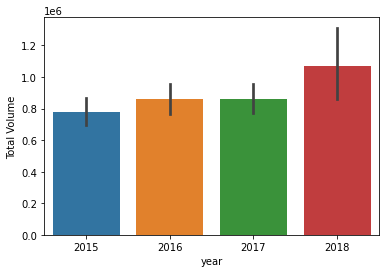

In [22]:
sns.barplot(x='year',y='Total Volume',data=df)

TotalVolume of Sales is higher in 2018, lower in 2015.

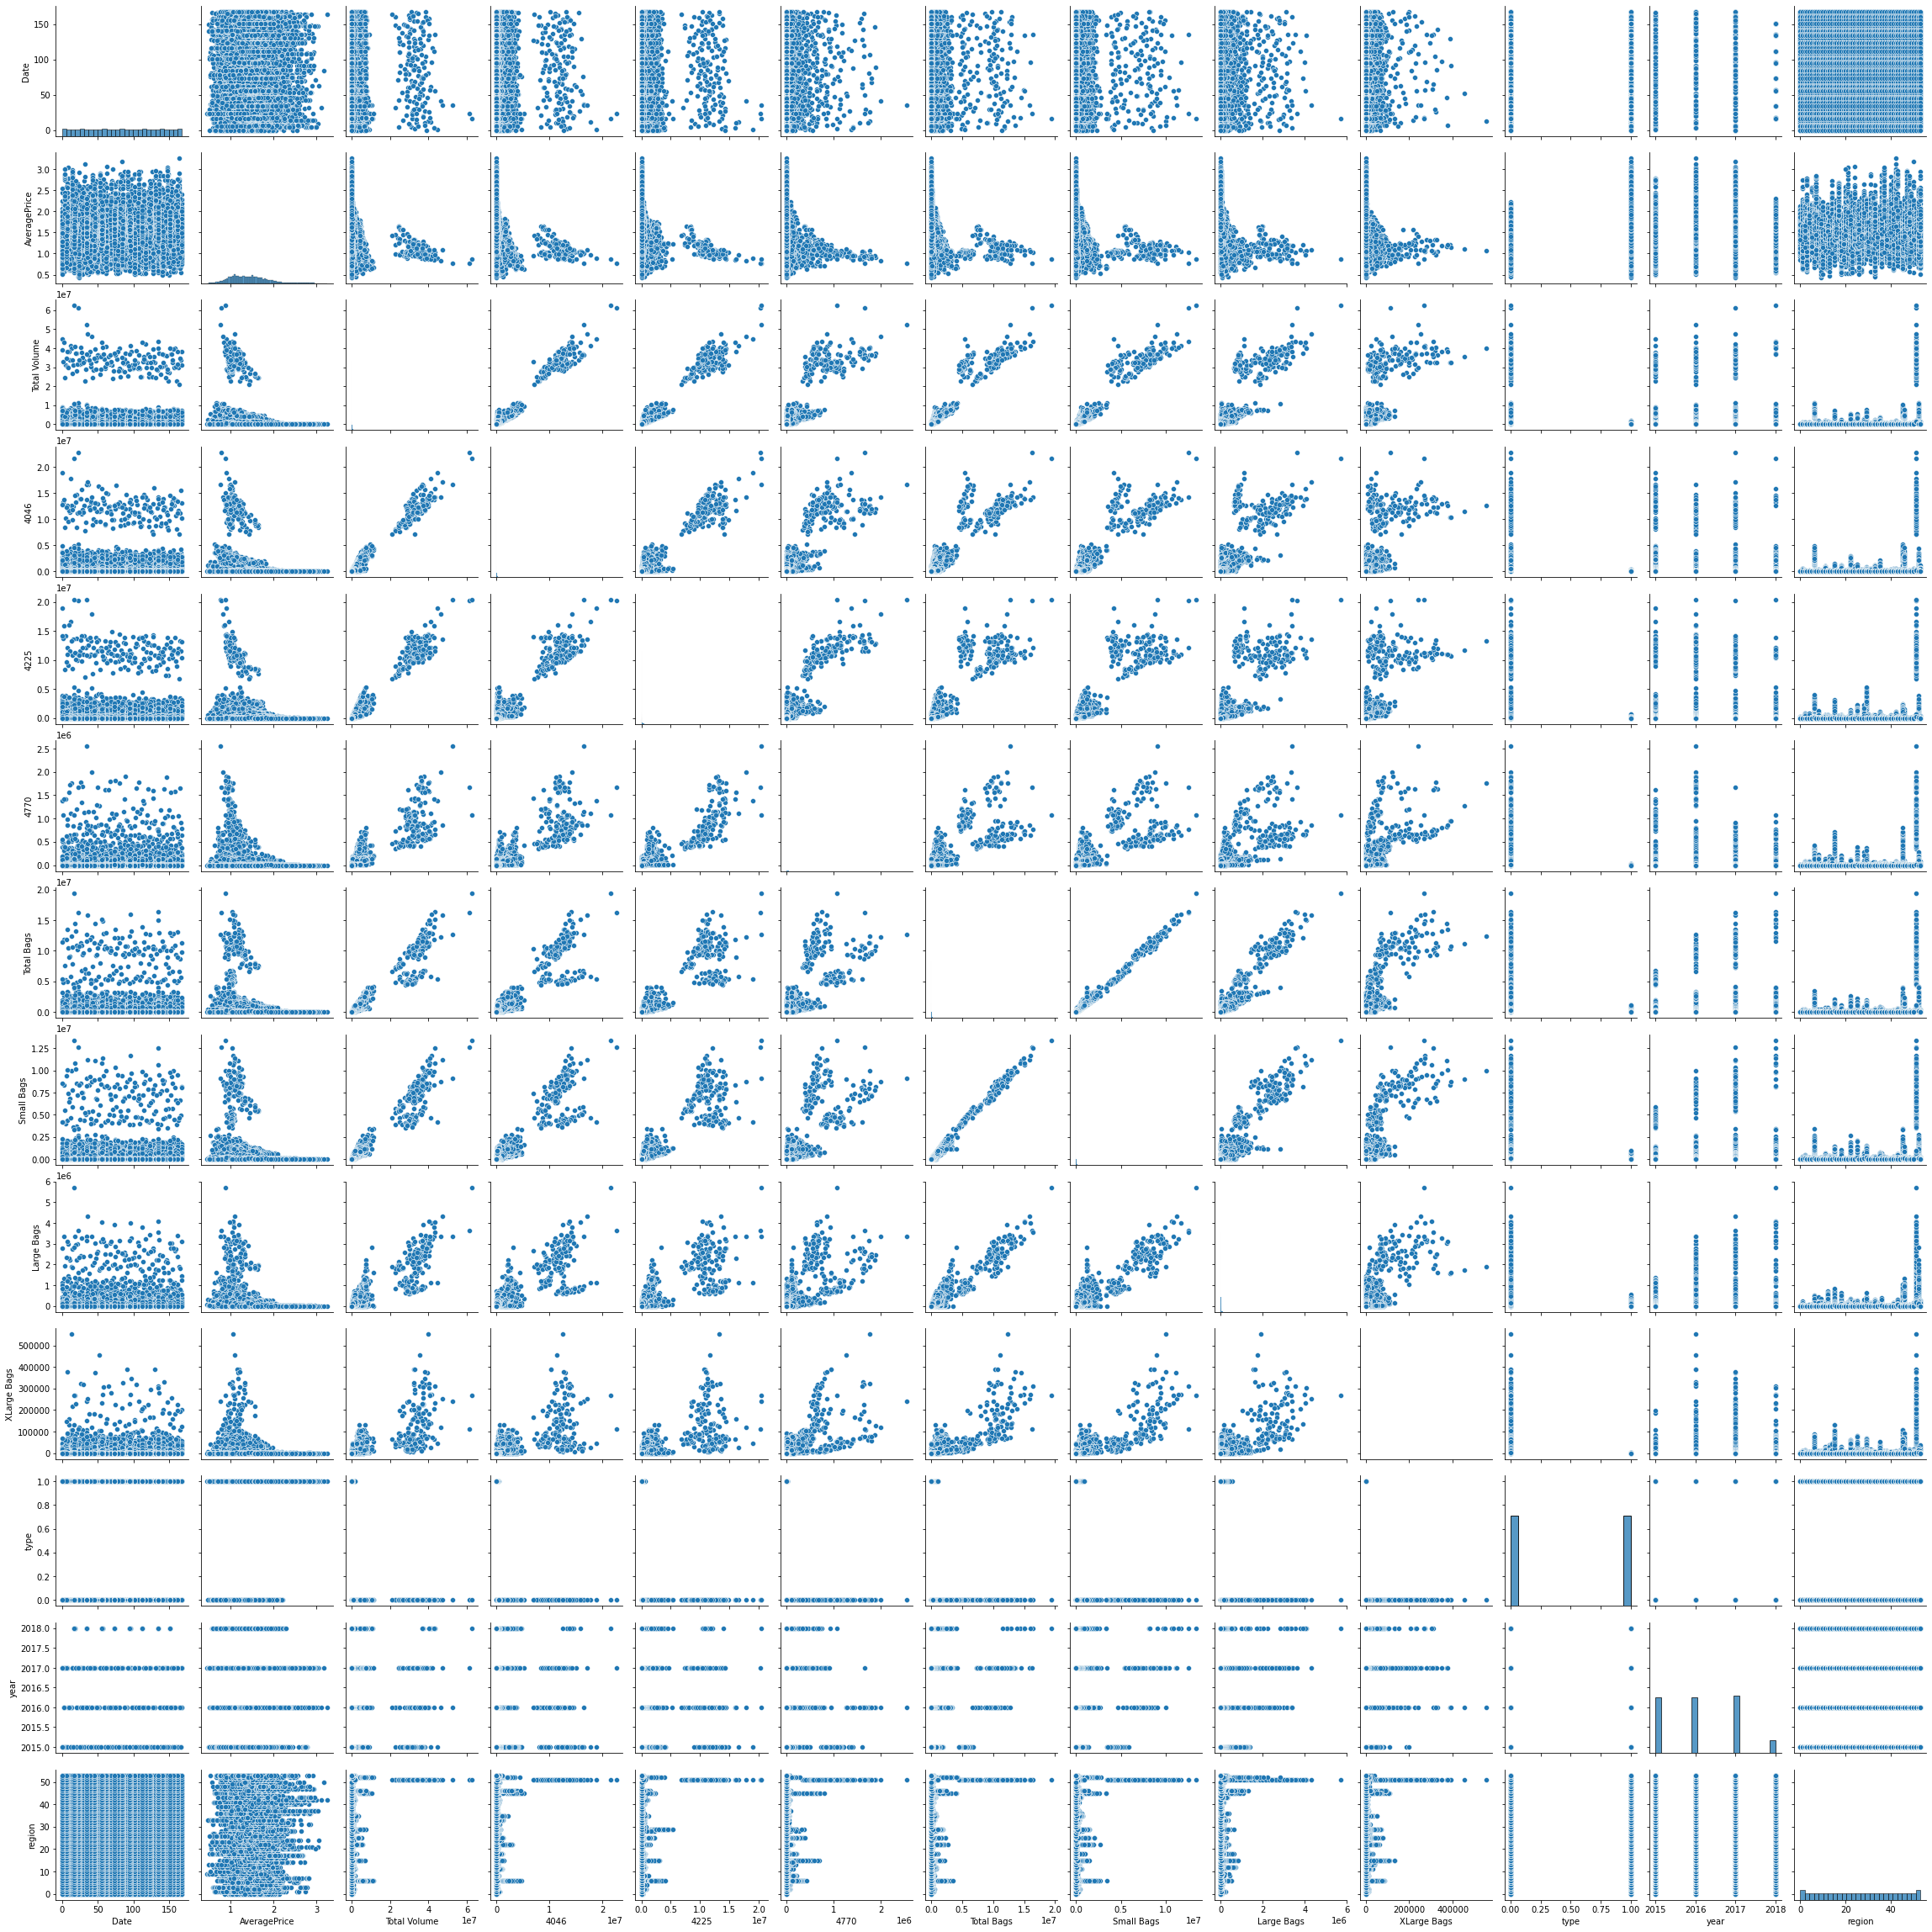

In [23]:
sns.pairplot(df)

# Checking Outliers

Date                AxesSubplot(0.125,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4225               AxesSubplot(0.125,0.518913;0.168478x0.16413)
4770            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Large Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
type            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
year            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
region                AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

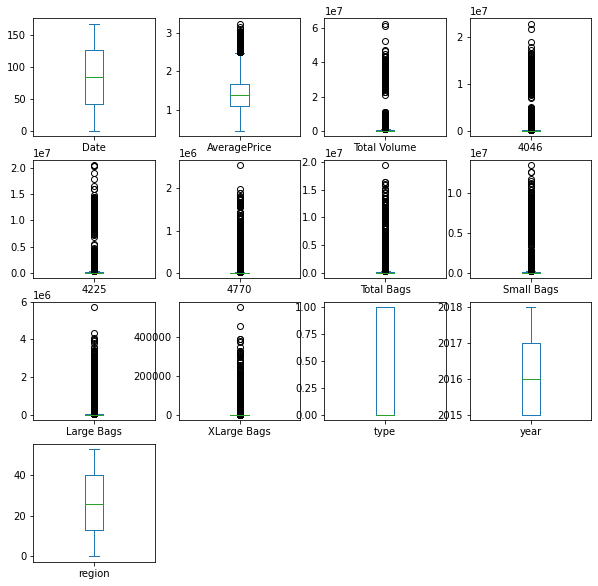

In [24]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

In [25]:
df.shape

(18249, 13)

Outliers are present in AveragePrice, TotalVolume, 4046, 4225, 4770, TotalBags, SmallBags, LargeBags, XLargeBags.

# Removing Outliers

In [26]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [27]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (17651, 13)


In [28]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,72,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,33,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,151,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,112,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,73,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [29]:
dataloss=(18249-17651)/18249*100

In [30]:
dataloss

3.276891884486821

Dataloss is 3.2 percentage.

# Correlation

In [31]:
corr=df.corr()
corr

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000e+00,0.030277,-0.006375,-0.007552,-0.009925,0.000606,0.002847,0.004717,-0.004552,0.010138,-0.002563,-0.003997,-3.727220e-08
AveragePrice,3.027715e-02,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-3.242341e-03
Total Volume,-6.375256e-03,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,7.667573e-02
4046,-7.551555e-03,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,1.190669e-01
4225,-9.925226e-03,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,1.100177e-02
4770,6.056791e-04,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-9.597170e-02
Total Bags,2.847385e-03,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,8.589194e-02
Small Bags,4.716708e-03,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,6.597621e-02
Large Bags,-4.551839e-03,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,1.276346e-01
XLarge Bags,1.013832e-02,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-4.433761e-02


In [32]:
correlation=list(df.columns)

In [33]:
correlation.insert(14,'AveragePrice')

In [34]:
corr=df[correlation]

<AxesSubplot:>

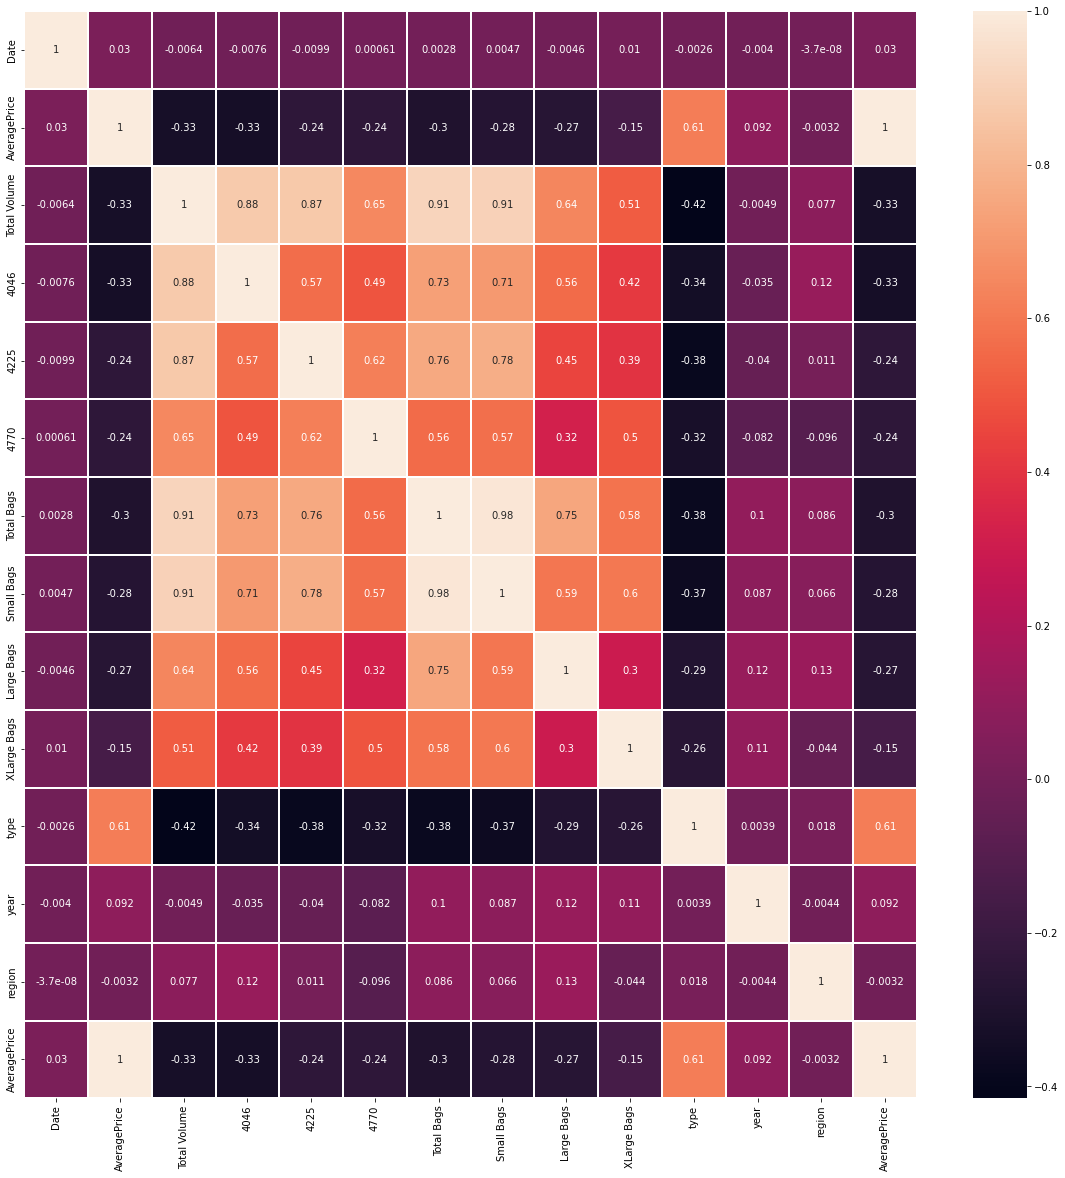

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(corr.corr(),linewidths=.1,annot=True)

The XLarge Bags and type is highly negatively correlated.

The year and month is positively less correlated.

# Skewness

In [36]:
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [41]:
import numpy as np

df['XLarge Bags']=np.sqrt(df['XLarge Bags'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    3.767138
4046            2.497504
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [43]:
df['4046']=np.sqrt(df['4046'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    3.767138
4046            0.234534
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [45]:
df['Total Volume']=np.sqrt(df['Total Volume'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    0.886698
4046            0.234534
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [47]:
df['4225']=np.sqrt(df['4225'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    0.886698
4046            0.234534
4225            0.843699
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [50]:
df['4770']=np.sqrt(df['4770'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    0.886698
4046            0.234534
4225            0.843699
4770            0.029629
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [52]:
df['Total Bags']=np.sqrt(df['Total Bags'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    0.886698
4046            0.234534
4225            0.843699
4770            0.029629
Total Bags      0.836412
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [54]:
df['Small Bags']=np.sqrt(df['Small Bags'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    0.886698
4046            0.234534
4225            0.843699
4770            0.029629
Total Bags      0.836412
Small Bags      0.793773
Large Bags      5.053434
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [56]:
df['Large Bags']=np.sqrt(df['Large Bags'])
df.skew()

Date           -0.002634
AveragePrice    0.377432
Total Volume    0.886698
4046            0.234534
4225            0.843699
4770            0.029629
Total Bags      0.836412
Small Bags      0.793773
Large Bags      0.728979
XLarge Bags     0.853302
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

# Scaling

In [57]:
df1=df

In [58]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,15.920096,2.382093,15.275982,1.623065,9.656967,9.630976,3.107508,0.0,0,2015,0
1,111,1.35,15.305501,2.257382,14.535439,1.662404,9.874030,9.848614,3.142245,0.0,0,2015,0
2,72,0.93,18.542699,2.304228,18.176305,1.838448,9.500084,9.469866,3.186814,0.0,0,2015,0
3,33,1.08,16.764708,2.408412,16.379383,1.708449,8.731035,8.680353,3.400804,0.0,0,2015,0
4,160,1.28,15.030617,2.353566,14.469837,1.717688,8.867812,8.796074,3.749697,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,11.431128,2.593514,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,2018,53
18245,151,1.71,10.855760,2.423934,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,2018,53
18246,112,1.87,10.831982,2.423990,7.037446,2.279092,9.844959,9.833855,2.550414,0.0,1,2018,53
18247,73,1.93,11.282718,2.500358,7.389107,2.278728,10.234040,10.222358,2.659148,0.0,1,2018,53


In [59]:
x=df1.drop('AveragePrice', axis=1)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,15.920096,2.382093,15.275982,1.623065,9.656967,9.630976,3.107508,0.0,0,2015,0
1,111,15.305501,2.257382,14.535439,1.662404,9.874030,9.848614,3.142245,0.0,0,2015,0
2,72,18.542699,2.304228,18.176305,1.838448,9.500084,9.469866,3.186814,0.0,0,2015,0
3,33,16.764708,2.408412,16.379383,1.708449,8.731035,8.680353,3.400804,0.0,0,2015,0
4,160,15.030617,2.353566,14.469837,1.717688,8.867812,8.796074,3.749697,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,11.431128,2.593514,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,2018,53
18245,151,10.855760,2.423934,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,2018,53
18246,112,10.831982,2.423990,7.037446,2.279092,9.844959,9.833855,2.550414,0.0,1,2018,53
18247,73,11.282718,2.500358,7.389107,2.278728,10.234040,10.222358,2.659148,0.0,1,2018,53


In [60]:
y=df1['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [61]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.350156,-0.303686,-0.684812,0.158329,-0.109204,-0.636048,-0.475351,-0.800692,-0.680997,-1.019047,-1.210013,-1.695495
1,0.550750,-0.364136,-0.782796,0.070375,-0.080963,-0.605756,-0.444324,-0.794989,-0.680997,-1.019047,-1.210013,-1.695495
2,-0.248657,-0.045732,-0.745990,0.502798,0.045416,-0.657941,-0.498319,-0.787671,-0.680997,-1.019047,-1.210013,-1.695495
3,-1.048064,-0.220612,-0.664133,0.289379,-0.047908,-0.765265,-0.610873,-0.752539,-0.680997,-1.019047,-1.210013,-1.695495
4,1.555133,-0.391173,-0.707225,0.062584,-0.041276,-0.746177,-0.594375,-0.695258,-0.680997,-1.019047,-1.210013,-1.695495
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.376026,-0.745211,-0.518700,-0.913277,-1.274378,-0.479484,-0.324148,-0.562450,-0.680997,0.981309,1.980756,1.747054
17647,1.370654,-0.801803,-0.651937,-0.746965,-1.274378,-0.614564,-0.462121,-0.613897,-0.680997,0.981309,1.980756,1.747054
17648,0.571247,-0.804141,-0.651893,-0.820156,0.361748,-0.609813,-0.446428,-0.892155,-0.680997,0.981309,1.980756,1.747054
17649,-0.228160,-0.759808,-0.591892,-0.778390,0.361487,-0.555515,-0.391043,-0.874303,-0.680997,0.981309,1.980756,1.747054


In [62]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5313859808645836  on Random_state  147


# Creating train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=147)

In [64]:
x_train.shape

(14120, 12)

In [65]:
y_train.shape

(14120,)

In [66]:
x_test.shape

(3531, 12)

In [67]:
y_test.shape

(3531,)

# Linear Regression

In [68]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5263678236335301
MAE: 0.21352990907878347
MSE: 0.07211767468092353
RMSE: 0.2685473416009243


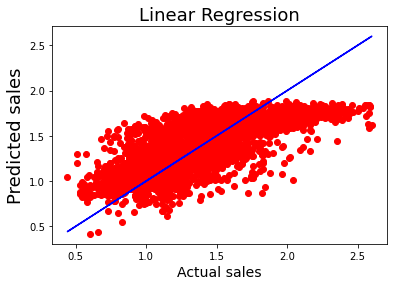

In [69]:
plt.scatter(x=y_test, y=predLR, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# Decision Tree Regressor

In [70]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(y_test, preddtr))
print('MSE:',metrics.mean_squared_error(y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddtr)))

R2_score: 0.6743231266725819
MAE: 0.14799207023506092
MSE: 0.04958923817615406
RMSE: 0.22268641219471397


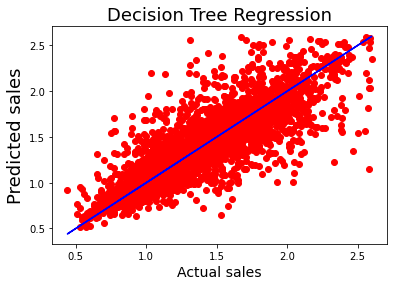

In [71]:
plt.scatter(x=y_test, y=preddtr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Decision Tree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# KNeighbours Regressor

In [72]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
predknr=KNR.predict(x_test)
print('R2_score:',r2_score(y_test,predknr))
print('MAE:',metrics.mean_absolute_error(y_test, predknr))
print('MSE:',metrics.mean_squared_error(y_test, predknr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknr)))

R2_score: 0.7219086328981998
MAE: 0.15022033418295103
MSE: 0.04234362390257718
RMSE: 0.20577566401928382


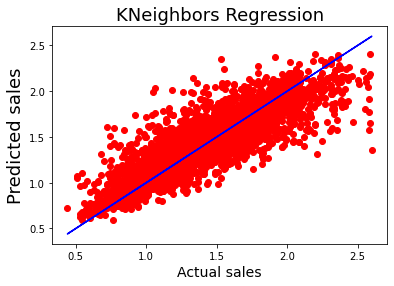

In [73]:
plt.scatter(x=y_test, y=predknr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNeighbors Regression', fontsize=18)
plt.savefig('knr.png')
plt.show()

# Support Vector Regressor

In [74]:
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('R2_score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

R2_score: 0.7261534152516411
MAE: 0.15380394614598664
MSE: 0.0416972914781096
RMSE: 0.20419914661454783


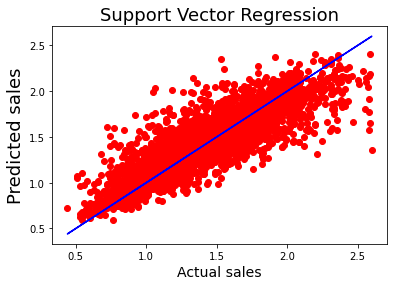

In [75]:
plt.scatter(x=y_test, y=predknr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Support Vector Regression', fontsize=18)
plt.savefig('knr.png')
plt.show()

# Regularization

# Lasso Regressor

In [76]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [77]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: -0.00015694704053648145
MAE: 0.32069163973001574
MSE: 0.15228904820166975
RMSE: 0.3902422942245878


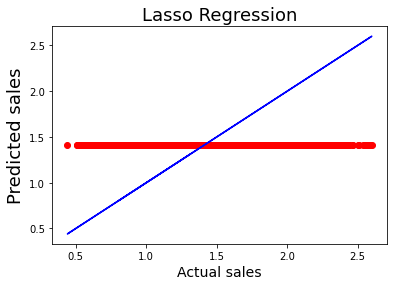

In [78]:
plt.scatter(x=y_test, y=pred_lasso, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Lasso Regression', fontsize=18)
plt.savefig('lasso.png')
plt.show()

# Ridge Regressor

In [79]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0, 'solver': 'sag'}


In [80]:
ridge=Ridge(alpha=10,solver='svd')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.5262006086900175
MAE: 0.2134497124446398
MSE: 0.0721431356894862
RMSE: 0.2685947424829574


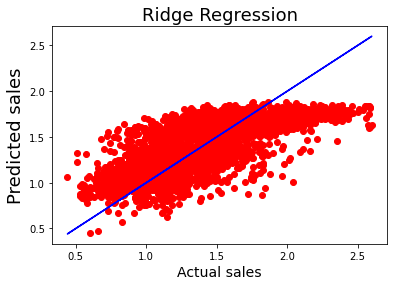

In [81]:
plt.scatter(x=y_test, y=pred_ridge, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Ridge Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# SDG Regression

In [82]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

R2_Score: 0.5171073508005537
MAE: 0.21503254302457459
MSE: 0.07352772197180561
RMSE: 0.27115995643126517


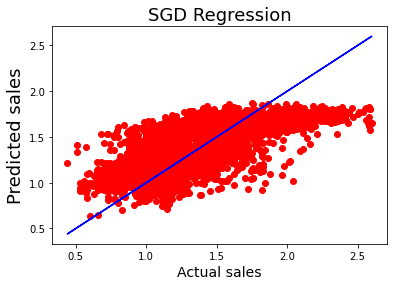

In [83]:
plt.scatter(x=y_test, y=predSGD, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('SGD Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# Checking cross validation Score

In [84]:
rfscore=cross_val_score(LR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 50.86999254223905


In [85]:
rfscore=cross_val_score(DTR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 63.783745181959326


In [86]:
rfscore=cross_val_score(KNR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 69.11544229624164


In [87]:
rfscore=cross_val_score(svr, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 69.74716171733422


In [88]:
rfscore=cross_val_score(lasso, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: -0.03241343727352852


In [89]:
rfscore=cross_val_score(ridge, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 50.852591031084415


In [90]:
rfscore=cross_val_score(SGD, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 49.774884321438066


# Classification

In [91]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,15.920096,2.382093,15.275982,1.623065,9.656967,9.630976,3.107508,0.0,0,2015,0
1,111,1.35,15.305501,2.257382,14.535439,1.662404,9.874030,9.848614,3.142245,0.0,0,2015,0
2,72,0.93,18.542699,2.304228,18.176305,1.838448,9.500084,9.469866,3.186814,0.0,0,2015,0
3,33,1.08,16.764708,2.408412,16.379383,1.708449,8.731035,8.680353,3.400804,0.0,0,2015,0
4,160,1.28,15.030617,2.353566,14.469837,1.717688,8.867812,8.796074,3.749697,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,11.431128,2.593514,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,2018,53
18245,151,1.71,10.855760,2.423934,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,2018,53
18246,112,1.87,10.831982,2.423990,7.037446,2.279092,9.844959,9.833855,2.550414,0.0,1,2018,53
18247,73,1.93,11.282718,2.500358,7.389107,2.278728,10.234040,10.222358,2.659148,0.0,1,2018,53


In [92]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,15.920096,2.382093,15.275982,1.623065,9.656967,9.630976,3.107508,0.0,0,2015,0
1,111,1.35,15.305501,2.257382,14.535439,1.662404,9.874030,9.848614,3.142245,0.0,0,2015,0
2,72,0.93,18.542699,2.304228,18.176305,1.838448,9.500084,9.469866,3.186814,0.0,0,2015,0
3,33,1.08,16.764708,2.408412,16.379383,1.708449,8.731035,8.680353,3.400804,0.0,0,2015,0
4,160,1.28,15.030617,2.353566,14.469837,1.717688,8.867812,8.796074,3.749697,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,11.431128,2.593514,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,2018,53
18245,151,1.71,10.855760,2.423934,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,2018,53
18246,112,1.87,10.831982,2.423990,7.037446,2.279092,9.844959,9.833855,2.550414,0.0,1,2018,53
18247,73,1.93,11.282718,2.500358,7.389107,2.278728,10.234040,10.222358,2.659148,0.0,1,2018,53


In [93]:
X=df1.drop('region', axis=1)
X

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,150,1.33,15.920096,2.382093,15.275982,1.623065,9.656967,9.630976,3.107508,0.0,0,2015
1,111,1.35,15.305501,2.257382,14.535439,1.662404,9.874030,9.848614,3.142245,0.0,0,2015
2,72,0.93,18.542699,2.304228,18.176305,1.838448,9.500084,9.469866,3.186814,0.0,0,2015
3,33,1.08,16.764708,2.408412,16.379383,1.708449,8.731035,8.680353,3.400804,0.0,0,2015
4,160,1.28,15.030617,2.353566,14.469837,1.717688,8.867812,8.796074,3.749697,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,11.431128,2.593514,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,2018
18245,151,1.71,10.855760,2.423934,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,2018
18246,112,1.87,10.831982,2.423990,7.037446,2.279092,9.844959,9.833855,2.550414,0.0,1,2018
18247,73,1.93,11.282718,2.500358,7.389107,2.278728,10.234040,10.222358,2.659148,0.0,1,2018


In [94]:
Y=df['region']
Y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [83]:
Y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

# Multicollinearity

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["features"]=X.columns
    print(vif)

In [86]:
vif_calc()

    VIF Factor      features
0     3.985451          Date
1    26.768287  AveragePrice
2   725.174792  Total Volume
3    76.584025          4046
4   130.386539          4225
5     3.800207          4770
6   533.834235    Total Bags
7   292.842959    Small Bags
8    30.038165    Large Bags
9     2.351136   XLarge Bags
10    4.564506          type
11   31.017850          year


In [97]:
X.drop("Total Volume", axis=1, inplace=True)

In [98]:
X

,Date,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,150,1.33,2.382093,15.275982,1.623065,9.656967,9.630976,3.107508,0.0,0,2015
1,111,1.35,2.257382,14.535439,1.662404,9.874030,9.848614,3.142245,0.0,0,2015
2,72,0.93,2.304228,18.176305,1.838448,9.500084,9.469866,3.186814,0.0,0,2015
3,33,1.08,2.408412,16.379383,1.708449,8.731035,8.680353,3.400804,0.0,0,2015
4,160,1.28,2.353566,14.469837,1.717688,8.867812,8.796074,3.749697,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,2.593514,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,2018
18245,151,1.71,2.423934,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,2018
18246,112,1.87,2.423990,7.037446,2.279092,9.844959,9.833855,2.550414,0.0,1,2018
18247,73,1.93,2.500358,7.389107,2.278728,10.234040,10.222358,2.659148,0.0,1,2018


In [99]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["features"]=X.columns
    print(vif)

In [100]:
vif_calc()

    VIF Factor      features
0     3.983690          Date
1    26.971446  AveragePrice
2    28.080996          4046
3    18.869210          4225
4     9.400068          4770
5   314.429975    Total Bags
6   178.525254    Small Bags
7    16.492948    Large Bags
8     3.029507   XLarge Bags
9     7.753869          type
10   56.863655          year


In [101]:
X.drop("Total Bags", axis=1, inplace=True)
X

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,150,1.33,2.382093,15.275982,1.623065,9.630976,3.107508,0.0,0,2015
1,111,1.35,2.257382,14.535439,1.662404,9.848614,3.142245,0.0,0,2015
2,72,0.93,2.304228,18.176305,1.838448,9.469866,3.186814,0.0,0,2015
3,33,1.08,2.408412,16.379383,1.708449,8.680353,3.400804,0.0,0,2015
4,160,1.28,2.353566,14.469837,1.717688,8.796074,3.749697,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,2.593514,6.253398,0.000000,10.691594,4.558618,0.0,1,2018
18245,151,1.71,2.423934,7.653692,0.000000,9.723774,4.245257,0.0,1,2018
18246,112,1.87,2.423990,7.037446,2.279092,9.833855,2.550414,0.0,1,2018
18247,73,1.93,2.500358,7.389107,2.278728,10.222358,2.659148,0.0,1,2018


In [102]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["features"]=X.columns
    print(vif)

In [103]:
vif_calc()

   VIF Factor      features
0    3.983631          Date
1   25.711937  AveragePrice
2   28.074790          4046
3   17.963549          4225
4    9.399579          4770
5   21.447301    Small Bags
6    5.417327    Large Bags
7    3.007068   XLarge Bags
8    7.634579          type
9   52.651681          year


# Creating train_test_split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=147)

In [105]:
X_train.shape

(13238, 10)

In [106]:
Y_train.shape

(13238,)

In [107]:
X_test.shape

(4413, 10)

In [108]:
Y_test.shape

(4413,)

# Logistic Regression

In [109]:
Lr=LogisticRegression()
Lr.fit(X_train, Y_train)
predlR=Lr.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predlR)*100)
print(confusion_matrix(Y_test,predlR))
print(classification_report(Y_test,predlR))

Accuaracy 6.208928166779968
[[11  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 6  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  3  0]
 [ 0  0  0 ... 18  4  0]
 [ 8  0  3 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.05      0.13      0.07        82
           1       0.00      0.00      0.00        84
           2       0.11      0.16      0.13        80
           3       0.00      0.00      0.00       106
           4       0.00      0.00      0.00        85
           5       0.01      0.11      0.02        64
           6       0.11      0.22      0.15        69
           7       0.00      0.00      0.00        99
           8       0.12      0.41      0.19        80
           9       0.05      0.35      0.08        66
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00        90
          12       0.09      0.20      0.12        84
          13       0.00      0.00      0.00        78
     

In [110]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Lr, X, Y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.0386367768120965


# Decision Tree Classifier

In [111]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
preddtc=dtc.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, preddtc)*100)
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Accuaracy 78.51801495581238
[[63  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  2]
 [ 0  0 70 ...  0  0  5]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  3  2 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        82
           1       0.70      0.63      0.66        84
           2       0.86      0.88      0.87        80
           3       0.84      0.78      0.81       106
           4       0.87      0.80      0.83        85
           5       0.61      0.77      0.68        64
           6       0.86      0.93      0.90        69
           7       0.86      0.80      0.83        99
           8       0.91      0.89      0.90        80
           9       0.70      0.79      0.74        66
          10       0.70      0.65      0.67        93
          11       0.91      0.89      0.90        90
          12       0.84      0.76      0.80        84
          13       0.74      0.79      0.77        78
     

In [112]:
scr=cross_val_score(dtc, X, Y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.5483573657198926


# KNeighbors Classifier

In [113]:
knc=KNeighborsClassifier()
knc.fit(X_train, Y_train)
predknc=knc.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predknc)*100)
print(confusion_matrix(Y_test,predknc))
print(classification_report(Y_test,predknc))

Accuaracy 22.9775662814412
[[61  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  1  3]
 [ 0  2 46 ...  0  0  1]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  4  0 ...  0  4  0]
 [ 0 17  6 ...  0  0  1]]
              precision    recall  f1-score   support

           0       0.28      0.74      0.41        82
           1       0.11      0.32      0.17        84
           2       0.26      0.57      0.36        80
           3       0.25      0.29      0.27       106
           4       0.20      0.27      0.23        85
           5       0.10      0.22      0.14        64
           6       0.40      0.41      0.40        69
           7       0.17      0.28      0.21        99
           8       0.52      0.56      0.54        80
           9       0.17      0.35      0.23        66
          10       0.10      0.18      0.13        93
          11       0.18      0.20      0.19        90
          12       0.32      0.31      0.32        84
          13       0.11      0.12      0.11        78
      

In [114]:
scr=cross_val_score(knc, X, Y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.25335536402386627


# Support Vector Classifier

In [115]:
svc=SVC()
svc.fit(X_train, Y_train)
predsvc=svc.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

Accuaracy 1.4502605937004305
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00       106
           4       0.00      0.00      0.00        85
           5       0.01      1.00      0.03        64
           6       0.00      0.00      0.00        69
           7       0.00      0.00      0.00        99
           8       0.00      0.00      0.00        80
           9       0.00      0.00      0.00        66
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00        90
          12       0.00      0.00      0.00        84
          13       0.00      0.00      0.00        78
          14       0.00      0.00      0

In [116]:
scr=cross_val_score(svc, X, Y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.03705053500240284


In [117]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train, Y_train)
predrf=rf.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predrf)*100)  # testing accuracy
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Accuaracy 90.77724903693633
[[77  0  0 ...  0  0  0]
 [ 0 66  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  1  2 ...  0  0 62]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        82
           1       0.77      0.79      0.78        84
           2       0.94      0.96      0.95        80
           3       0.96      0.84      0.89       106
           4       0.94      0.96      0.95        85
           5       0.86      0.86      0.86        64
           6       0.97      0.99      0.98        69
           7       0.92      0.86      0.89        99
           8       0.98      0.99      0.98        80
           9       0.84      0.92      0.88        66
          10       0.83      0.82      0.82        93
          11       0.97      0.96      0.96        90
          12       0.98      0.96      0.97        84
          13       0.92      0.88      0.90        78
     

In [118]:
scr=cross_val_score(rf, X, Y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.700358235394639


In [119]:
RandomForestClassifier()

RandomForestClassifier()

In [120]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [121]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [123]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [124]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 400}

In [125]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [126]:
RandomForestClassifier()

RandomForestClassifier()

In [127]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=400)

In [129]:
GCV_pred=GCV.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.7983231361885339

# Saving the final Model

In [133]:
import joblib

joblib.dump(rf,'Avacadomodel.obj')

Avacado_loadmodel=joblib.load('Avacadomodel.obj')
Avacado_loadmodel.predict(X_test)

array([39, 24, 23, ..., 46, 19, 22])

In [134]:
conclusion=pd.DataFrame([Avacado_loadmodel.predict(X_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412
Predicted,39,24,23,41,41,6,5,40,5,12,...,24,36,33,38,0,5,10,46,19,22
Original,39,24,23,41,41,6,5,40,5,12,...,24,36,33,38,0,5,10,46,19,22
